In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Original_Aspect-Dataset-gold_standard.csv")

In [3]:
df

,review_id,review_text,aspect,polarity
0,ICLR_2019_684,Hence I believe the authors need to clarify wh...,clarity,-1.0
1,ICLR_2020_1176,I do not see obvious advantage of the proposed...,soundness,-1.0
2,NIPS_2018_956,The notation is flexible enough to capture bot...,summary,0.0
3,NIPS_2016_440,This paper presents an algorithm for compiling...,summary,0.0
4,ICLR_2018_305,How were the tasks selected,replicability,-1.0
...,...,...,...,...
148082,NIPS_2018_585,I do see that there is some novelty in this wo...,originality,-1.0
148083,ICLR_2020_1972,it remains conceptually unclear why it should ...,soundness,-1.0
148084,NIPS_2019_133,its versatility,motivation,1.0
148085,ICLR_2020_1283,The idea is simple and well explained .,clarity,1.0


In [4]:
df[['venue', 'year', 'id']] = df['review_id'].str.split('_', expand=True)

In [5]:
df

,review_id,review_text,aspect,polarity,venue,year,id
0,ICLR_2019_684,Hence I believe the authors need to clarify wh...,clarity,-1.0,ICLR,2019,684
1,ICLR_2020_1176,I do not see obvious advantage of the proposed...,soundness,-1.0,ICLR,2020,1176
2,NIPS_2018_956,The notation is flexible enough to capture bot...,summary,0.0,NIPS,2018,956
3,NIPS_2016_440,This paper presents an algorithm for compiling...,summary,0.0,NIPS,2016,440
4,ICLR_2018_305,How were the tasks selected,replicability,-1.0,ICLR,2018,305
...,...,...,...,...,...,...,...
148082,NIPS_2018_585,I do see that there is some novelty in this wo...,originality,-1.0,NIPS,2018,585
148083,ICLR_2020_1972,it remains conceptually unclear why it should ...,soundness,-1.0,ICLR,2020,1972
148084,NIPS_2019_133,its versatility,motivation,1.0,NIPS,2019,133
148085,ICLR_2020_1283,The idea is simple and well explained .,clarity,1.0,ICLR,2020,1283


In [6]:
nips_df = df[df["venue"]=="NIPS"]
iclr_df = df[df["venue"]=="ICLR"]

In [7]:
nips_df

,review_id,review_text,aspect,polarity,venue,year,id
2,NIPS_2018_956,The notation is flexible enough to capture bot...,summary,0.0,NIPS,2018,956
3,NIPS_2016_440,This paper presents an algorithm for compiling...,summary,0.0,NIPS,2016,440
10,NIPS_2017_465,It is hard to read an algorithm in a paragraph .,clarity,-1.0,NIPS,2017,465
11,NIPS_2016_366,I would recommend the authors to work further ...,soundness,-1.0,NIPS,2016,366
12,NIPS_2016_108,The authors analyze the popular Gibbs sampling...,summary,0.0,NIPS,2016,108
...,...,...,...,...,...,...,...
148079,NIPS_2018_986,Line 152-158 I think this is a good idea,originality,1.0,NIPS,2018,986
148081,NIPS_2017_551,This paper proposes a framework called multisc...,summary,0.0,NIPS,2017,551
148082,NIPS_2018_585,I do see that there is some novelty in this wo...,originality,-1.0,NIPS,2018,585
148084,NIPS_2019_133,its versatility,motivation,1.0,NIPS,2019,133


In [8]:
nips_df['year'].value_counts()

year
2019    21787
2018    16356
2016    14623
2017     9175
Name: count, dtype: int64

In [9]:
nips_df_2016 = nips_df[nips_df["year"] == "2016"]
nips_df_2017 = nips_df[nips_df["year"] == "2017"]
nips_df_2018 = nips_df[nips_df["year"] == "2018"]
nips_df_2019 = nips_df[nips_df["year"] == "2019"]

In [10]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def word_count(df) : 
    dataset = df

    # Tokenize the sentences and words
    sentences = [sent_tokenize(sentence) for sentence in dataset]
    words = [word_tokenize(sentence) for sentence in dataset]

    # Calculate the total number of sentences and words
    total_sentences = sum(len(sentence_list) for sentence_list in sentences)
    total_words = sum(len(word_list) for word_list in words)

    # Calculate the average number of words per sentence
    average_words_per_sentence = total_words / total_sentences

    print("Total number of sentences:", total_sentences)
    print("Total number of words:", total_words)
    print("Average number of words per sentence:", average_words_per_sentence)


In [11]:
word_count(nips_df_2016["review_text"])
word_count(nips_df_2017["review_text"])
word_count(nips_df_2018["review_text"])
word_count(nips_df_2019["review_text"])

Total number of sentences: 23777
Total number of words: 445647
Average number of words per sentence: 18.742776632880513
Total number of sentences: 14135
Total number of words: 264012
Average number of words per sentence: 18.6778917580474
Total number of sentences: 24984
Total number of words: 462477
Average number of words per sentence: 18.510926993275696
Total number of sentences: 28520
Total number of words: 476132
Average number of words per sentence: 16.69467040673212


In [12]:
print(nips_df_2016["aspect"].value_counts())
print("_________________")
print(nips_df_2016["polarity"].value_counts())

aspect
clarity                  2924
summary                  2874
soundness                2719
originality              1930
motivation               1511
substance                1417
meaningful_comparison     818
replicability             430
Name: count, dtype: int64
_________________
polarity
 1.0    5909
-1.0    5840
 0.0    2874
Name: count, dtype: int64


In [13]:
print(nips_df_2017["aspect"].value_counts())
print("_________________")
print(nips_df_2017["polarity"].value_counts())

aspect
clarity                  1840
summary                  1746
soundness                1717
originality              1209
motivation                979
substance                 851
meaningful_comparison     593
replicability             240
Name: count, dtype: int64
_________________
polarity
 1.0    3959
-1.0    3470
 0.0    1746
Name: count, dtype: int64


In [14]:
print(nips_df_2018["aspect"].value_counts())
print("_________________")
print(nips_df_2018["polarity"].value_counts())

aspect
clarity                  3439
soundness                3082
summary                  2703
originality              2250
motivation               1748
substance                1662
meaningful_comparison     973
replicability             499
Name: count, dtype: int64
_________________
polarity
 1.0    7323
-1.0    6330
 0.0    2703
Name: count, dtype: int64


In [15]:
print(nips_df_2019["aspect"].value_counts())
print("_________________")
print(nips_df_2019["polarity"].value_counts())

aspect
clarity                  4869
soundness                4196
originality              3514
summary                  2640
motivation               2441
substance                2085
meaningful_comparison    1417
replicability             625
Name: count, dtype: int64
_________________
polarity
 1.0    10688
-1.0     8459
 0.0     2640
Name: count, dtype: int64


In [16]:
iclr_df

,review_id,review_text,aspect,polarity,venue,year,id
0,ICLR_2019_684,Hence I believe the authors need to clarify wh...,clarity,-1.0,ICLR,2019,684
1,ICLR_2020_1176,I do not see obvious advantage of the proposed...,soundness,-1.0,ICLR,2020,1176
4,ICLR_2018_305,How were the tasks selected,replicability,-1.0,ICLR,2018,305
5,ICLR_2019_7,The work is original and is references the rel...,originality,1.0,ICLR,2019,7
6,ICLR_2020_690,better unsderstanding of `` perceptual metrics...,motivation,1.0,ICLR,2020,690
...,...,...,...,...,...,...,...
148074,ICLR_2020_213,from large datasets of demonstrations ( withou...,soundness,1.0,ICLR,2020,213
148076,ICLR_2020_759,This work investigates the collection of metho...,summary,0.0,ICLR,2020,759
148080,ICLR_2017_264,without showing that it is applicable in such ...,motivation,-1.0,ICLR,2017,264
148083,ICLR_2020_1972,it remains conceptually unclear why it should ...,soundness,-1.0,ICLR,2020,1972


In [17]:
iclr_df["year"].value_counts()

year
2020    37152
2019    27028
2018    14702
2017     7263
Name: count, dtype: int64

In [18]:
iclr_df_2017 = iclr_df[iclr_df["year"] == "2017"]
iclr_df_2018 = iclr_df[iclr_df["year"] == "2018"]
iclr_df_2019 = iclr_df[iclr_df["year"] == "2019"]
iclr_df_2020 = iclr_df[iclr_df["year"] == "2020"]

In [19]:
word_count(iclr_df_2017["review_text"])
word_count(iclr_df_2018["review_text"])
word_count(iclr_df_2019["review_text"])
word_count(iclr_df_2020["review_text"])

Total number of sentences: 9820
Total number of words: 169300
Average number of words per sentence: 17.24032586558045
Total number of sentences: 20782
Total number of words: 365118
Average number of words per sentence: 17.56895390241555
Total number of sentences: 37793
Total number of words: 658653
Average number of words per sentence: 17.427909930410394
Total number of sentences: 55079
Total number of words: 984394
Average number of words per sentence: 17.87240145972149


In [20]:
print(iclr_df_2017["aspect"].value_counts())
print("_________________")
print(iclr_df_2017["polarity"].value_counts())

aspect
soundness                1414
summary                  1246
clarity                  1132
originality              1067
substance                 899
motivation                756
meaningful_comparison     566
replicability             183
Name: count, dtype: int64
_________________
polarity
-1.0    3604
 1.0    2413
 0.0    1246
Name: count, dtype: int64


In [21]:
print(iclr_df_2018["aspect"].value_counts())
print("_________________")
print(iclr_df_2018["polarity"].value_counts())

aspect
soundness                2797
clarity                  2739
summary                  2402
originality              2014
substance                1680
motivation               1381
meaningful_comparison    1150
replicability             539
Name: count, dtype: int64
_________________
polarity
-1.0    7688
 1.0    4612
 0.0    2402
Name: count, dtype: int64


In [22]:
print(iclr_df_2019["aspect"].value_counts())
print("_________________")
print(iclr_df_2019["polarity"].value_counts())

aspect
soundness                5311
clarity                  5106
summary                  4153
originality              3710
substance                3198
motivation               2402
meaningful_comparison    2192
replicability             956
Name: count, dtype: int64
_________________
polarity
-1.0    14311
 1.0     8564
 0.0     4153
Name: count, dtype: int64


In [23]:
print(iclr_df_2020["aspect"].value_counts())
print("_________________")
print(iclr_df_2020["polarity"].value_counts())

aspect
soundness                7206
clarity                  6743
summary                  6182
originality              4657
substance                4594
motivation               3402
meaningful_comparison    3021
replicability            1347
Name: count, dtype: int64
_________________
polarity
-1.0    19408
 1.0    11562
 0.0     6182
Name: count, dtype: int64


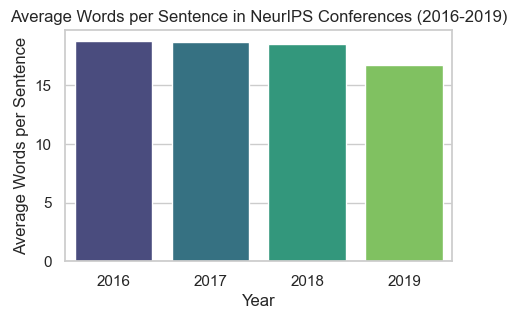

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
years = ['2016', '2017', '2018', '2019']
avg_words_per_sentence = [18.742776632880513, 18.6778917580474, 18.510926993275696, 16.69467040673212]

# Create a bar plot for average words per sentence
sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))
sns.barplot(x=years, y=avg_words_per_sentence, palette="viridis")
plt.title('Average Words per Sentence in NeurIPS Conferences (2016-2019)')
plt.xlabel('Year')
plt.ylabel('Average Words per Sentence')
plt.show()

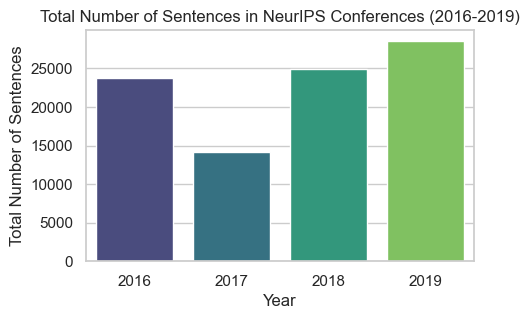

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
years = ['2016', '2017', '2018', '2019']
total_sentences = [23777, 14135, 24984, 28520]

# Create a bar plot for total number of sentences
sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))
sns.barplot(x=years, y=total_sentences, palette="viridis")
plt.title('Total Number of Sentences in NeurIPS Conferences (2016-2019)')
plt.xlabel('Year')
plt.ylabel('Total Number of Sentences')
plt.show()

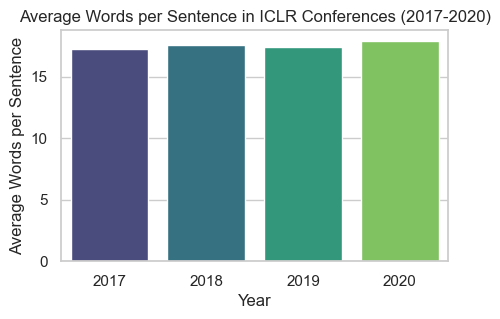

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
years = ['2017', '2018', '2019', '2020']
avg_words_per_sentence = [17.24032586558045, 17.56895390241555, 17.427909930410394, 17.87240145972149]

# Create a bar plot for average words per sentence
sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))
sns.barplot(x=years, y=avg_words_per_sentence, palette="viridis")
plt.title('Average Words per Sentence in ICLR Conferences (2017-2020)')
plt.xlabel('Year')
plt.ylabel('Average Words per Sentence')
plt.show()

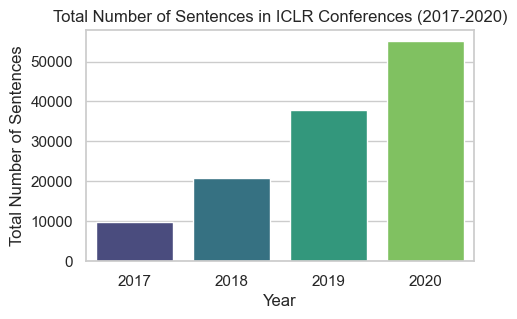

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
years = ['2017', '2018', '2019', '2020']
total_sentences = [9820, 20782, 37793, 55079]

# Create a bar plot for total number of sentences
sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))
sns.barplot(x=years, y=total_sentences, palette="viridis")
plt.title('Total Number of Sentences in ICLR Conferences (2017-2020)')
plt.xlabel('Year')
plt.ylabel('Total Number of Sentences')
plt.show()

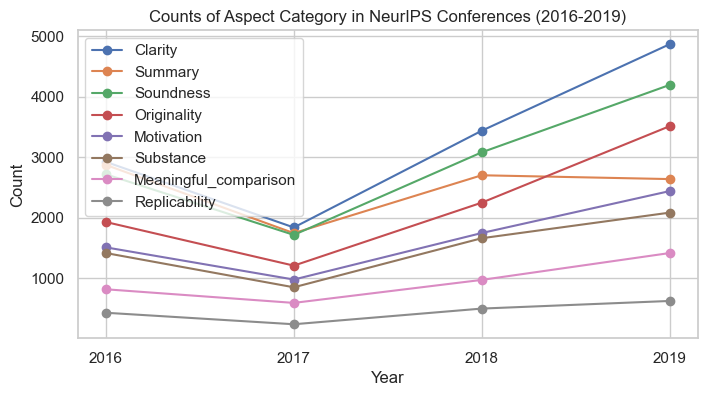

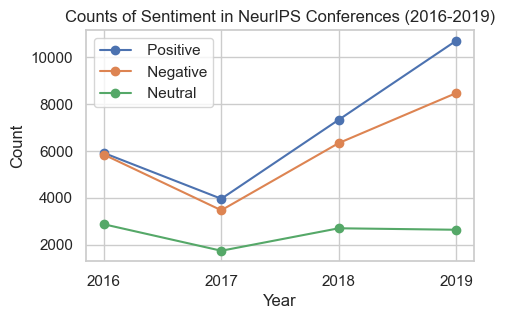

In [28]:
import matplotlib.pyplot as plt

# Data
years = ['2016', '2017', '2018', '2019']

# Aspects
aspects_data = {
    'Clarity': [2924, 1840, 3439, 4869],
    'Summary': [2874, 1746, 2703, 2640],
    'Soundness': [2719, 1717, 3082, 4196],
    'Originality': [1930, 1209, 2250, 3514],
    'Motivation': [1511, 979, 1748, 2441],
    'Substance': [1417, 851, 1662, 2085],
    'Meaningful_comparison': [818, 593, 973, 1417],
    'Replicability': [430, 240, 499, 625]
}

# Polarity
polarity_data = {
    'Positive': [5909, 3959, 7323, 10688],
    'Negative': [5840, 3470, 6330, 8459],
    'Neutral': [2874, 1746, 2703, 2640]
}

# Plotting aspects
plt.figure(figsize=(8,4))
for aspect, data in aspects_data.items():
    plt.plot(years, data, marker='o', label=aspect)
plt.title('Counts of Aspect Category in NeurIPS Conferences (2016-2019)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

# Plotting polarity
plt.figure(figsize=(5, 3))
for polarity, data in polarity_data.items():
    plt.plot(years, data, marker='o', label=' {}'.format(polarity))
plt.title('Counts of Sentiment in NeurIPS Conferences (2016-2019)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

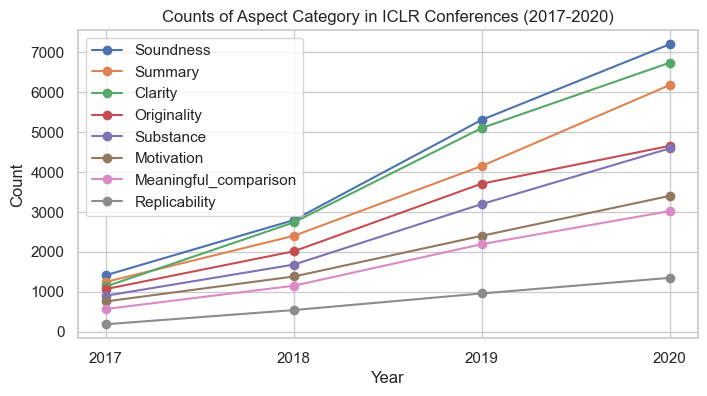

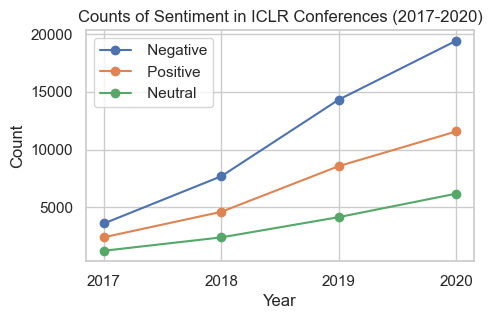

In [29]:
import matplotlib.pyplot as plt

# Data
years = ['2017', '2018', '2019', '2020']

# Aspects
aspects_data = {
    'Soundness': [1414, 2797, 5311, 7206],
    'Summary': [1246, 2402, 4153, 6182],
    'Clarity': [1132, 2739, 5106, 6743],
    'Originality': [1067, 2014, 3710, 4657],
    'Substance': [899, 1680, 3198, 4594],
    'Motivation': [756, 1381, 2402, 3402],
    'Meaningful_comparison': [566, 1150, 2192, 3021],
    'Replicability': [183, 539, 956, 1347]
}

# Polarity
polarity_data = {
    'Negative': [3604, 7688, 14311, 19408],
    'Positive': [2413, 4612, 8564, 11562],
    'Neutral': [1246, 2402, 4153, 6182]
}

# Plotting aspects
plt.figure(figsize=(8, 4))
for aspect, data in aspects_data.items():
    plt.plot(years, data, marker='o', label=aspect)
plt.title('Counts of Aspect Category in ICLR Conferences (2017-2020)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

# Plotting polarity
plt.figure(figsize=(5, 3))
for polarity, data in polarity_data.items():
    plt.plot(years, data, marker='o', label=' {}'.format(polarity))
plt.title('Counts of Sentiment in ICLR Conferences (2017-2020)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
df

,review_id,review_text,aspect,polarity,venue,year,id
0,ICLR_2019_684,Hence I believe the authors need to clarify wh...,clarity,-1.0,ICLR,2019,684
1,ICLR_2020_1176,I do not see obvious advantage of the proposed...,soundness,-1.0,ICLR,2020,1176
2,NIPS_2018_956,The notation is flexible enough to capture bot...,summary,0.0,NIPS,2018,956
3,NIPS_2016_440,This paper presents an algorithm for compiling...,summary,0.0,NIPS,2016,440
4,ICLR_2018_305,How were the tasks selected,replicability,-1.0,ICLR,2018,305
...,...,...,...,...,...,...,...
148082,NIPS_2018_585,I do see that there is some novelty in this wo...,originality,-1.0,NIPS,2018,585
148083,ICLR_2020_1972,it remains conceptually unclear why it should ...,soundness,-1.0,ICLR,2020,1972
148084,NIPS_2019_133,its versatility,motivation,1.0,NIPS,2019,133
148085,ICLR_2020_1283,The idea is simple and well explained .,clarity,1.0,ICLR,2020,1283


In [40]:
df["aspect"].unique()[:-1]

array(['clarity', 'soundness', 'summary', 'replicability', 'originality',
       'motivation', 'meaningful_comparison', 'substance'], dtype=object)

In [55]:
df[df["polarity"]== 0.0] 


,review_id,review_text,aspect,polarity,venue,year,id
2,NIPS_2018_956,The notation is flexible enough to capture bot...,summary,0.0,NIPS,2018,956
3,NIPS_2016_440,This paper presents an algorithm for compiling...,summary,0.0,NIPS,2016,440
8,ICLR_2018_491,This paper proposed a reinforcement learning (...,summary,0.0,ICLR,2018,491
12,NIPS_2016_108,The authors analyze the popular Gibbs sampling...,summary,0.0,NIPS,2016,108
21,ICLR_2020_1844,This paper proposes a new algorithm named Mult...,summary,0.0,ICLR,2020,1844
...,...,...,...,...,...,...,...
148058,ICLR_2019_659,The paper propses to use a combination of Dire...,summary,0.0,ICLR,2019,659
148068,NIPS_2016_344,"In this submission , the author ( s ) provide ...",summary,0.0,NIPS,2016,344
148076,ICLR_2020_759,This work investigates the collection of metho...,summary,0.0,ICLR,2020,759
148081,NIPS_2017_551,This paper proposes a framework called multisc...,summary,0.0,NIPS,2017,551


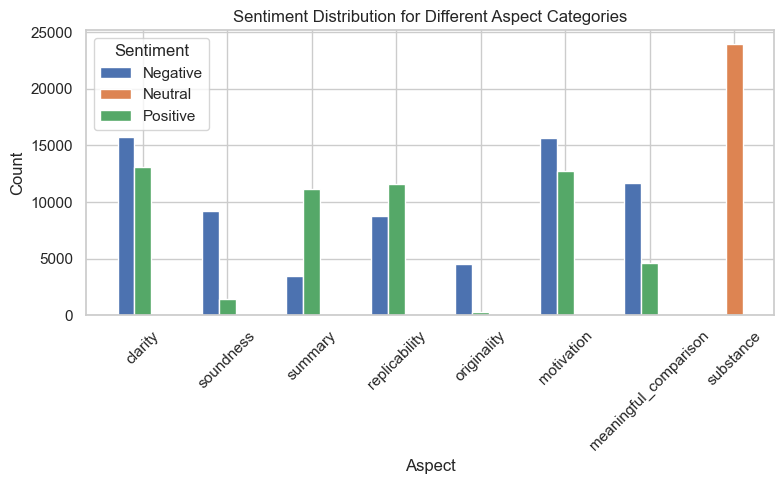

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a DataFrame named 'df'

# Convert "nan" string to actual NaN values
df['aspect'] = df['aspect'].replace('nan', pd.NA)

# Drop rows with NaN values in the 'aspect' column
df_cleaned = df.dropna(subset=['aspect'])

# Grouping by aspect and polarity, and counting occurrences
aspect_sentiment_counts = df_cleaned.groupby(['aspect', 'polarity']).size().unstack(fill_value=0)

# Get unique sentiments
sentiments = df_cleaned['polarity'].unique()

# Get unique aspects
aspects = df_cleaned['aspect'].unique()

# Sentiment labels
sentiment_labels = {1.0: 'Positive', 0.0: 'Neutral', -1.0: 'Negative'}

# Plotting
plt.figure(figsize=(8, 5))

# Define bar width
bar_width = 0.2  # Reduced width for closer bars

# Define the x positions for the bars
x_neg = range(len(aspects))
x_neu = [x + bar_width for x in x_neg]
x_pos = [x + 1 * bar_width for x in x_neg]

# Iterate over each sentiment and plot bars for each aspect
for i, sentiment in enumerate(sentiments):
    plt.bar(x_neg if i == 0 else (x_neu if i == 1 else x_pos), 
            aspect_sentiment_counts[sentiment], 
            width=bar_width, 
            label=sentiment_labels[sentiment])  # Use sentiment labels here

# Adding labels and title
plt.title('Sentiment Distribution for Different Aspect Categories')
plt.xlabel('Aspect')
plt.ylabel('Count')
plt.xticks([x + bar_width for x in x_neg], aspects, rotation=45)
plt.legend(title='Sentiment')

# Show plot
plt.tight_layout()
plt.show()


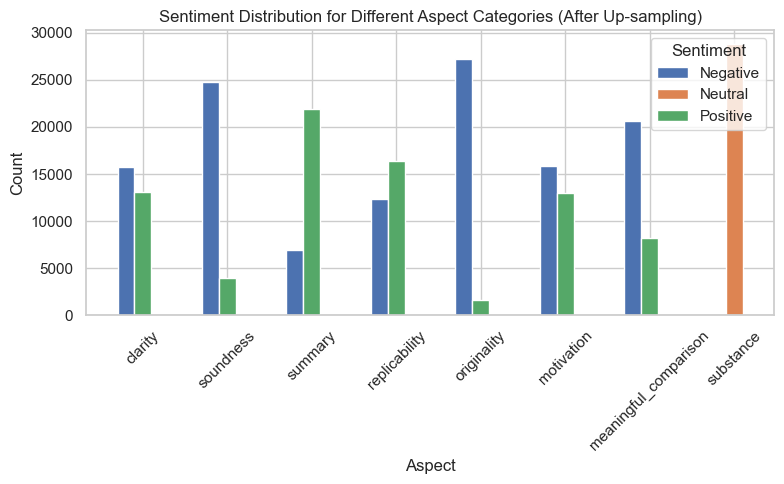

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Assuming you have loaded your dataset into a DataFrame named 'df'

# Convert "nan" string to actual NaN values
df['aspect'] = df['aspect'].replace('nan', pd.NA)

# Drop rows with NaN values in the 'aspect' column
df_cleaned = df.dropna(subset=['aspect'])

# Keep only the 'aspect' and 'polarity' columns
df_cleaned = df_cleaned[['aspect', 'polarity']]

# Up-sample using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_cleaned.drop(['aspect'], axis=1), df_cleaned['aspect'])
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Grouping by aspect and polarity, and counting occurrences after up-sampling
aspect_sentiment_counts_resampled = df_resampled.groupby(['aspect', 'polarity']).size().unstack(fill_value=0)

# Get unique sentiments
sentiments = df_resampled['polarity'].unique()

# Get unique aspects
aspects = df_resampled['aspect'].unique()

# Sentiment labels
sentiment_labels = {1.0: 'Positive', 0.0: 'Neutral', -1.0: 'Negative'}

# Plotting
plt.figure(figsize=(8, 5))

# Define bar width
bar_width = 0.2  # Reduced width for closer bars

# Define the x positions for the bars
x_neg = range(len(aspects))
x_neu = [x + bar_width for x in x_neg]
x_pos = [x + 1 * bar_width for x in x_neg]

# Iterate over each sentiment and plot bars for each aspect
for i, sentiment in enumerate(sentiments):
    plt.bar(x_neg if i == 0 else (x_neu if i == 1 else x_pos), 
            aspect_sentiment_counts_resampled[sentiment], 
            width=bar_width, 
            label=sentiment_labels[sentiment])  # Use sentiment labels here

# Adding labels and title
plt.title('Sentiment Distribution for Different Aspect Categories (After Up-sampling)')
plt.xlabel('Aspect')
plt.ylabel('Count')
plt.xticks([x + bar_width for x in x_neg], aspects, rotation=45)
plt.legend(title='Sentiment')

# Show plot
plt.tight_layout()
plt.show()
